# Isométries de $\mathbb{R}^3$

## Exercice

On rappelle que, dans $\mathbb{R}^3$, la rotation d'axe dirigé (et orienté) par le vecteur $\underline{e}$, tel que $\|\underline{e}\|=1$ et d'angle $\theta\in\mathbb{R}$ est donnée par la formule
$$r_{\underline{e},\theta}\;:\left\{\begin{array}{ccc} \mathbb{R}^3&\longrightarrow&\mathbb{R}^3\\ \underline{x}&\longmapsto& \left\langle \underline{e},\underline{x}\right\rangle.\underline{e}+\cos(\theta)\,\left(\underline{x}-\left\langle \underline{e},\underline{x}\right\rangle.\underline{e}\right)+\sin(\theta).\underline{e}\wedge\underline{x}\end{array}\right.$$
1. Proposer un code `Python` d'une fonction prenant un vecteur $\underline{u}\in\mathbb{R}^3\setminus\left\{\underline{0}\right\}$ et un scalaire $\theta\in\mathbb{R}$ et produisant la matrice de la rotation d'axe dirigé par $\underline{u}$ et d'angle $\theta$ dans la base canonique.
1. Trouver la matrice de la rotation d'axe dirigé par le vecteur $(1,-2,1)$ et d'angle $\pi/3$ dans la base canonique.

In [1]:
import sympy as sp
sp.init_printing()

In [2]:
# Question 1
def r(u, theta):
    N = u.norm()
    if not (N != 0 and u.shape == (3, 1)):
        raise Exception("Les données sont mauvaises !")
    E = 1/N*u
    R = sp.zeros(3, 3)
    for j in range(3):
        cj = sp.Matrix([int(i == j) for i in range(3)])
        R[:, j] = E.dot(cj)*E+sp.cos(theta)*(cj-E.dot(cj)*E) + \
            sp.sin(theta)*E.cross(cj)
    return R

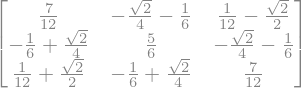

In [3]:
# Question 2
r(sp.Matrix([1, -2, 1]), sp.pi/3)

## Exercice

On appelle *rotation affine d'axe passant par un point $A$, dirigé par le vecteur $\underline{e}\in\mathbb{R}^3$* ($\|\underline{e}\|=1$) *et d'angle $\theta\in\mathbb{R}$*, l'application affine qui laisse invariant $A$ et qui a pour application linéaire sous-jacente l'application $r_{\underline{e},\theta}$ défini au premier exercice. On la note $R_{A,\underline{e},\theta}$.
1. Soit $M\in\mathbb{R}^3$, un point quelconque de $\mathbb{R}^3$, écrire l'équation de
$$R_{A,\underline{e},\theta}(M)$$
1. Soit les rotations de $\mathbb{R}^3$
$$R_{(1,1,1),(1,0,0),\pi/3}\quad\text{et}\quad R_{(1,1,1),(0,1,0),\pi/4}$$
reconnaître la composée 
$$R_{O,(1,0,0),\pi/3}\circ R_{(1,1,1),(0,1,0),\pi/4}$$
2. Soit $A$, $A'$ deux points de $\mathbb{R}^3$, $\underline{e}$ et $\underline{e}'$ deux vecteurs *unitaires* de $\mathbb{R}^3$ et $\theta$, $\theta'$ deux réels, que dire de 
$$R_{A,\underline{e},\theta}\circ R_{A',\underline{e}',\theta'}\;?$$
1. Soit les rotations de $\mathbb{R}^3$
$$R_{O,(1,0,0),\pi/3}\quad\text{et}\quad R_{(1,1,1),(0,1,0),\pi/4}$$
reconnaître la composée 
$$R_{O,(1,0,0),\pi/3}\circ R_{(1,1,1),(0,1,0),\pi/4}$$

<div class="alert alert-info">Pour simplifier les matrices, nous pourrons utiliser la fonction suivante.
</div>

In [4]:
def mat_simp(M):
    n, p = M.shape
    for i in range(n):
        for j in range(p):
            M[i, j] = M[i, j].simplify().expand().simplify()
    return M

**Question 1**

On écrit $M=A+\overrightarrow{AM}$, on a alors
$$R_{A,\underline{e},\theta}(M)=R_{A,\underline{e},\theta}\left(A+\overrightarrow{AM}\right)=A+r_{\underline{e},\theta}\left(\overrightarrow{AM}\right)$$

**Question 2**

Le point $\Omega=(1,1,1)$ est fixe, on aurait intérêt à le prendre comme origine. Cela donne

In [5]:
x, y, z = sp.symbols('x y z', real=True)
M = sp.Matrix([x, y, z])
Omega = sp.Matrix([1, 1, 1])


def R1(M):
    return Omega+r(sp.Matrix([1, 0, 0]), sp.pi/3)@(M-Omega)


def R2(M):
    return Omega+r(sp.Matrix([0, 1, 0]), sp.pi/4)@(M-Omega)


Mprime = mat_simp(R1(R2(M)))

Pour étudier une application affine, on procède en deux temps
1. on étudie la nature de l'application vectorielle sous-jacente ;
1. puis, on cherche à savoir s'il y a un point fixe, où si il existe une translation qui intervient.

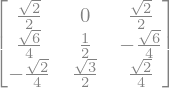

In [6]:
# Étude de la partie vectorielle
O = r(sp.Matrix([1, 0, 0]), sp.pi/3)@r(sp.Matrix([0, 1, 0]), sp.pi/4)
O

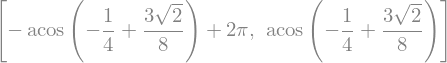

In [7]:
angles = sp.solve(sp.Eq(1+2*sp.cos(x), O.trace()), x)
angles

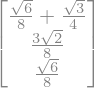

In [8]:
B = (O-O.transpose())/2
sE = sp.Matrix([B[2, 1], B[0, 2], B[1, 0]])
sE

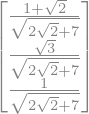

In [9]:
theta = angles[1]  # L'un des deux, cela importe peu
E = sE/sp.sin(theta).simplify()  # Si on change d'angle, cela change le signe
mat_simp(E)

In [10]:
# On compare l'application initiale avec la rotation trouvée (angle theta et vecteur adapté)
mat_simp(Omega+r(E, theta)@(M-Omega)-Mprime)

C'est bien la rotation annoncée !

<div class="alert alert-info">

Soit $\mathcal{E}$ un espace affine de direction $E$. Si on prend $A$ un point quelconque, en notant $\phi$ une application affine et $\overrightarrow{\phi}$ l'application linéaire sous-jacente, on a
$$\forall M\in \mathcal{E},\; \phi(M)=\phi(A)+\overrightarrow{\phi}\left(\overrightarrow{AM}\right)$$
On a donc toujours, pour $M\in\mathcal{E}$
$$\phi(M)=\underbrace{\left(A+\overrightarrow{\phi}\left(\overrightarrow{AM}\right)\right)}_{=\text{application affine avec $A$ fixe}}+\underbrace{\overrightarrow{\phi(A)\,A}}_{=\text{translation}}$$

**Question 3**

On écrit, pour $M\in\mathbb{R}^3$
$$R_{A,\underline{e},\theta}\circ R_{A',\underline{e}',\theta'}(M)=A+r_{\underline{e},\theta}\left(\overrightarrow{AR_{A',\underline{e}',\theta'}(M)}\right)=A+r_{\underline{e},\theta}\left(\overrightarrow{AA'}\right)+r_{\underline{e},\theta}\circ r_{\underline{e'},\theta'}\left(\overrightarrow{A'M}\right)$$
1. Si $r_{\underline{e},\theta}\circ r_{\underline{e'},\theta'}=\mathrm{id}_{_{\mathbb{R}^3}}$, alors on a deux cas
    1. Si $A+r_{\underline{e},\theta}\left(\overrightarrow{AA'}\right)=A'$, on obtient l'identité de $\mathbb{R}^3$.
    1. Sinon, c'est une translation de vecteur $\overrightarrow{A'A}+r_{\underline{e},\theta}\left(\overrightarrow{AA'}\right)$.
1. Si $r_{\underline{e},\theta}\circ r_{\underline{e'},\theta'}$ est une symétrie orthogonale par rapport à une droite dirigée par un vecteur $\overrightarrow{u}$, alors on a deux cas
    1. Il y a un point fixe $\Omega$, on obtient une symétrie orthogonale par rapport à la droite $\left(\Omega\ ;\overrightarrow{u}\right)$.
    1. Il n'y a pas de point fixe, il existe alors un point $\Omega$ tel que $\overrightarrow{\Omega R_{A,\underline{e},\theta}\circ R_{A',\underline{e}',\theta'}(\Omega)}$ est colinéaire à $\overrightarrow{u}$, c'est donc la composée de la symétrie orthogonale par rapport à la droite $\left(\Omega\ ;\overrightarrow{u}\right)$ et de la translation de vecteur $\overrightarrow{\Omega R_{A,\underline{e},\theta}\circ R_{A',\underline{e}',\theta'}(\Omega)}$.
1. Si $r_{\underline{e},\theta}\circ r_{\underline{e'},\theta'}$ est une rotation d'axe dirigé par $\overrightarrow{u}$ et d'angle $\varphi$, on a encore deux cas
    1. Il y a un point fixe $\Omega$, on obtient une rotation d'axe $\left(\Omega\ ;\overrightarrow{u}\right)$ et d'angle $\varphi$.
    1. Il n'y a pas de point fixe, il existe alors un point $\Omega$ tel que $\overrightarrow{\Omega R_{A,\underline{e},\theta}\circ R_{A',\underline{e}',\theta'}(\Omega)}$ est colinéaire à $\overrightarrow{u}$, c'est donc la composée de la rotation d'axe $\left(\Omega\ ;\overrightarrow{u}\right)$ et d'angle $\varphi$, avec une translation de vecteur  $\overrightarrow{\Omega R_{A,\underline{e},\theta}\circ R_{A',\underline{e}',\theta'}(\Omega)}$.

**Question 4**

Écrivons les deux équations.

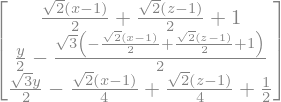

In [11]:
def R1(M):
    return (r(sp.Matrix([1, 0, 0]), sp.pi/3)@M)


def R2(M):
    A = sp.Matrix([1, 1, 1])
    return (A+r(sp.Matrix([0, 1, 0]), sp.pi/4)@(M-A))


Mprime = R1(R2(M))
Mprime

In [12]:
# Il n'y a pas de point fixe
sp.solve(Mprime-M, [x, y, z])

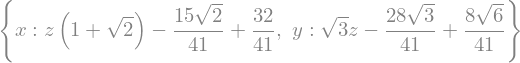

In [13]:
# Recherche de Omega. On exprime la colinéarité avec le produit vectoriel
sp.solve((Mprime-M).cross(E), [x, y, z])

In [14]:
# Choix d'un Omega (on prend n'importe quoi, cela ne change pas la translation car le vecteur reste constant)
Omega = M.subs(_).subs({z: 0})
OmegaPrime = Mprime.subs(_).subs({z: 0})

In [15]:
# La translation
tau = OmegaPrime-Omega

In [16]:
# On compare l'application initiale avec la composée de la translation et de la rotation
mat_simp(Omega+r(E, theta)@(M-Omega)+tau-Mprime)

## Exercice

On rappelle la fonction du Td-Tp 6, qui nous produisait la matrice de la symétrie orthogonale par rapport à l'hyperplan orthogonal à $\underline{u}$.

In [17]:
def mat(u):
    n = len(u)
    M = sp.zeros(n, n)
    for j in range(n):
        cj = sp.Matrix([int(i == j) for i in range(n)])
        Mcj = cj-2*cj.dot(u)/u.norm()**2*u
        for i in range(n):
            M[i, j] = Mcj[i]
    return M

**Décomposition $QR$.** Soit $A\in\mathrm{GL}_n\left(\mathbb{R}\right)$, on va la mettre sous la forme $O\cdot T$, où $O\in \mathrm{O}_n(\mathbb{R})$ et $T\in \mathrm{T}_n^+(\mathbb{R})$, avec
$$\forall i\in\{1,\ldots,n\},\; T_{i,i}>0$$
en utilisant l'algorithme suivant.
- Si la première colonne de $A$ n'est pas de la forme $$\begin{bmatrix} \alpha\\ 0\\\vdots\\0\end{bmatrix}$$ avec $\alpha>0$, on multiplie $A$ à gauche par une réflexion qui met la première colonne sous cette forme.
- Si la première colonne de $A$ est de la forme ci-dessus et que la deuxième colonne est de la forme $$\begin{bmatrix}\beta\\\gamma\\0\\\vdots\\0\end{bmatrix}$$ avec $\gamma>0$, on multiplie $A$ à gauche par une réflexion qui met la deuxième colonne sous cette forme *sans toucher à la première colonne !*
- etc.
- On continue jusqu'à avoir traité toutes les colonnes, on a alors trouver des matrices de réflexion $S_1$, ..., $S_q$ telles que
$$T=S_q\cdot\ldots\cdot S_1\cdot A\in T_n^+(\mathbb{R})$$
et donc 
$$A= \underbrace{S_1\cdot\ldots\cdot S_q}_{=O}\cdot T$$
et $O\in \mathrm{O}_n(\mathbb{R})$.

1. Effectuer à la main l'algorithme sur une matrice 
$$A = \begin{bmatrix}2&0&2&2
 \cr 1&1&2&2\cr 0&1&1&2\cr 0&0&2&0\cr 
 \end{bmatrix}$$
1. Proposer une fonction qui automatise le calcul.

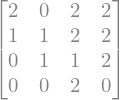

In [18]:
A = sp.Matrix([2, 0, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 0, 0, 2, 0]).reshape(4, 4)
A

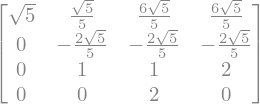

In [19]:
# Première colonne : une simple réflexion
S1 = mat(sp.Matrix([1, 0, 0, 0])-A[:, 0]/A[:, 0].norm())
mat_simp(S1@A)

Pour trouver la *bonne* réflexion, il faut s'assurer qu'elle ne change pas le premier vecteur. Pour cela, on met la première composante à zéro. Regardons d'abord ce qui se passe si on oublie ce fait.

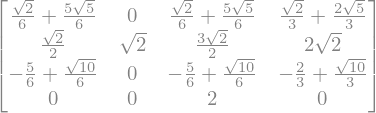

In [20]:
# Mauvaise technique
B = _.copy()
mat_simp(mat(sp.Matrix([0, 1, 0, 0])-B[:, 1]/B[:, 1].norm())@_)

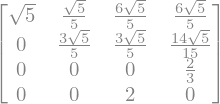

In [21]:
# Deuxième colonne
B[0, 1] = 0
S2 = mat(sp.Matrix([0, 1, 0, 0])-B[:, 1]/B[:, 1].norm())
mat_simp(S2@Out[19])

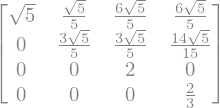

In [22]:
# Troisième colonne
B = _.copy()
B[0, 2], B[1, 2] = 0, 0  # Mettre toutes les coordonnées B[i, j] avec i<j à 0
S3 = mat(sp.Matrix([0, 0, 1, 0])-B[:, 2]/B[:, 2].norm())
mat_simp(S3@_)

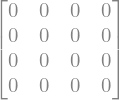

In [23]:
# Vérification
T = _
mat_simp(S1@S2@S3@T-A)

**Question 2**

In [24]:
def DecompositionQR(A):
    n, p = A.shape
    if n != p or A.det() == 0:
        raise Exception("Les données ne sont pas correctes")
    AA = A.copy()
    O = sp.eye(n)
    for i in range(n):
        if not AA[i+1:, i].is_zero_matrix:
            B = AA.copy()
            for j in range(i):
                B[j, i] = 0
            Ci = sp.Matrix([int(k == i) for k in range(n)])
            S = mat_simp(mat(Ci-B[:, i]/B[:, i].norm()))
            O = S@O
            AA = S@AA
    return O.transpose(), AA

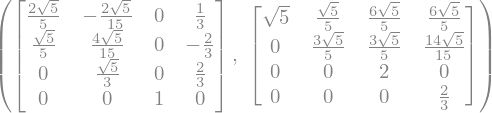

In [25]:
DecompositionQR(A)

In [26]:
# Vérifions
(_[0]@_[1]-A).is_zero_matrix

True

## Exercice

Programmer une fonction qui prend une matrice dans $\mathrm{O}_3(\mathbb{R})$ nous donne sa nature
- $\pm I_3$ 
- symétrie orthogonale par rapport à (à préciser)
- rotation d'axe (à préciser) et d'angle (à préciser)
- opposée d'une rotation (à préciser)

In [27]:
# Pour transformer le dictionnaire en équation
def Dict2Eq(d):
    eqs = []
    for i in d.keys():
        eqs.append(sp.Eq(i, d[i]))
    return eqs

In [28]:
def nature(O):
    if not (O.transpose()@O-sp.eye(3)).is_zero_matrix:
        raise Exception("La matrice n'est pas orthogonale !")
    x, y, z = sp.symbols('x y z', real=True)
    M = sp.Matrix([x, y, z])
    tr = O.trace()
    if tr == 3:
        print("C'est l'identité")
    elif tr == -3:
        print("C'est l'opposée de l'identité")
    elif tr == -1 and O.is_symmetric:
        print("C'est une symétrie orthogonale par rapport à une droite")
        res = sp.solve(O@M+M, [x, y, z])
        print("La droite est orthogonale au plan d'équation : ", end="")
        sp.pprint(Dict2Eq(res))
    elif tr == 1 and O.is_symmetric:
        print("C'est une réflexion")
        res = sp.solve(O@M-M, [x, y, z])
        print("Le plan de réflexion a pour équation : ", end="")
        sp.pprint(Dict2Eq(res))
    elif O.det() == 1:
        print("C'est une rotation")
        theta = sp.solve(sp.Eq(1+2*sp.cos(x), O.trace()), x)[0]
        A = (O-O.transpose())/2
        E = sp.Matrix([A[2, 1], A[0, 2], A[1, 0]])
        E = mat_simp(E/sp.sin(theta))
        print("Le couple (vecteur directeur de l'axe, angle de la rotation) est : ")
        sp.pprint((E, theta))
    else:
        print("C'est l'opposée d'une rotation.\n")
        print("Étude de -O ")
        nature(-O)

In [29]:
nature(O)

C'est une rotation
Le couple (vecteur directeur de l'axe, angle de la rotation) est : 
⎛⎡  -√2 - 1   ⎤                          ⎞
⎜⎢────────────⎥                          ⎟
⎜⎢  __________⎥                          ⎟
⎜⎢╲╱ 2⋅√2 + 7 ⎥                          ⎟
⎜⎢            ⎥                          ⎟
⎜⎢    -√3     ⎥                          ⎟
⎜⎢────────────⎥        ⎛  1   3⋅√2⎞      ⎟
⎜⎢  __________⎥, - acos⎜- ─ + ────⎟ + 2⋅π⎟
⎜⎢╲╱ 2⋅√2 + 7 ⎥        ⎝  4    8  ⎠      ⎟
⎜⎢            ⎥                          ⎟
⎜⎢    -1      ⎥                          ⎟
⎜⎢────────────⎥                          ⎟
⎜⎢  __________⎥                          ⎟
⎝⎣╲╱ 2⋅√2 + 7 ⎦                          ⎠


In [30]:
A = mat(sp.Matrix([1, 1, 1]))
nature(A)

C'est une réflexion
Le plan de réflexion a pour équation : [x = -y - z]


In [31]:
nature(-A)

C'est une symétrie orthogonale par rapport à une droite
La droite est orthogonale au plan d'équation : [x = -y - z]


In [32]:
nature(-O)

C'est l'opposée d'une rotation.

Étude de -O 
C'est une rotation
Le couple (vecteur directeur de l'axe, angle de la rotation) est : 
⎛⎡  -√2 - 1   ⎤                          ⎞
⎜⎢────────────⎥                          ⎟
⎜⎢  __________⎥                          ⎟
⎜⎢╲╱ 2⋅√2 + 7 ⎥                          ⎟
⎜⎢            ⎥                          ⎟
⎜⎢    -√3     ⎥                          ⎟
⎜⎢────────────⎥        ⎛  1   3⋅√2⎞      ⎟
⎜⎢  __________⎥, - acos⎜- ─ + ────⎟ + 2⋅π⎟
⎜⎢╲╱ 2⋅√2 + 7 ⎥        ⎝  4    8  ⎠      ⎟
⎜⎢            ⎥                          ⎟
⎜⎢    -1      ⎥                          ⎟
⎜⎢────────────⎥                          ⎟
⎜⎢  __________⎥                          ⎟
⎝⎣╲╱ 2⋅√2 + 7 ⎦                          ⎠
